# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import pandas as pandas
import numpy as numpy
import os
from sklearn.tree import DecisionTreeClassifier
os.chdir("C:\Siddhartha\Personal Documents\BOK\AIML\Decision Tree")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
pima_df = pandas.read_csv("diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
pima_df.shape

(768, 9)

In [6]:
pima_df[~pima_df.applymap(numpy.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [7]:
pima_df['Outcome'] = pandas.Categorical(pima_df["Outcome"])

In [8]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null category
dtypes: category(1), float64(2), int64(6)
memory usage: 48.9 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [9]:
print("Pregnencies \n", ((pima_df["Pregnancies"] == 0).value_counts()),"\n")
print("Glucose \n", (((pima_df == 0)["Glucose"]).value_counts()),"\n")
print("Blood Pressure \n", (((pima_df == 0)["BloodPressure"]).value_counts()),"\n")
print("SkinThickness \n", (((pima_df == 0)["SkinThickness"]).value_counts()),"\n")
print("Insulin \n", (((pima_df == 0)["Insulin"]).value_counts()),"\n")
print("BMI \n", (((pima_df == 0)["BMI"]).value_counts()),"\n")
print("DPF \n", (((pima_df == 0)["DiabetesPedigreeFunction"]).value_counts()),"\n")
print("Age \n", (((pima_df == 0)["Age"]).value_counts()),"\n")

Pregnencies 
 False    657
True     111
Name: Pregnancies, dtype: int64 

Glucose 
 False    763
True       5
Name: Glucose, dtype: int64 

Blood Pressure 
 False    733
True      35
Name: BloodPressure, dtype: int64 

SkinThickness 
 False    541
True     227
Name: SkinThickness, dtype: int64 

Insulin 
 False    394
True     374
Name: Insulin, dtype: int64 

BMI 
 False    757
True      11
Name: BMI, dtype: int64 

DPF 
 False    768
Name: DiabetesPedigreeFunction, dtype: int64 

Age 
 False    768
Name: Age, dtype: int64 



Inference : 

Glucose, BP, Skin Thickness, Insulin, BMI cannot be "0". These are missing values

# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [10]:
pima_df["Glucose"] = pima_df["Glucose"].replace(0,pima_df["Glucose"].median())
pima_df["BloodPressure"] = pima_df["BloodPressure"].replace(0,pima_df["BloodPressure"].median())
pima_df["Insulin"] = pima_df["Insulin"].replace(0,pima_df["Insulin"].median())
pima_df["SkinThickness"] = pima_df["SkinThickness"].replace(0,pima_df["SkinThickness"].median())
pima_df["BMI"] = pima_df["BMI"].replace(0,pima_df["BMI"].median())

In [11]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Q5 Print the descriptive statistics of each & every column using describe() function

In [12]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0    500
1    268
Name: Outcome, dtype: int64

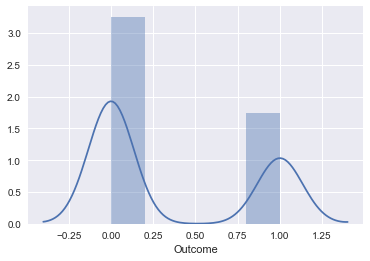

In [13]:
sns.distplot(pima_df["Outcome"])
pima_df["Outcome"].value_counts()

In [14]:
268/768

0.3489583333333333

Inference : 

The data set seems to be skewed towards "Non Diabetes or 0"

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

Using bivariate analysis check for useful relationships between attributes and attributes and the target class


# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


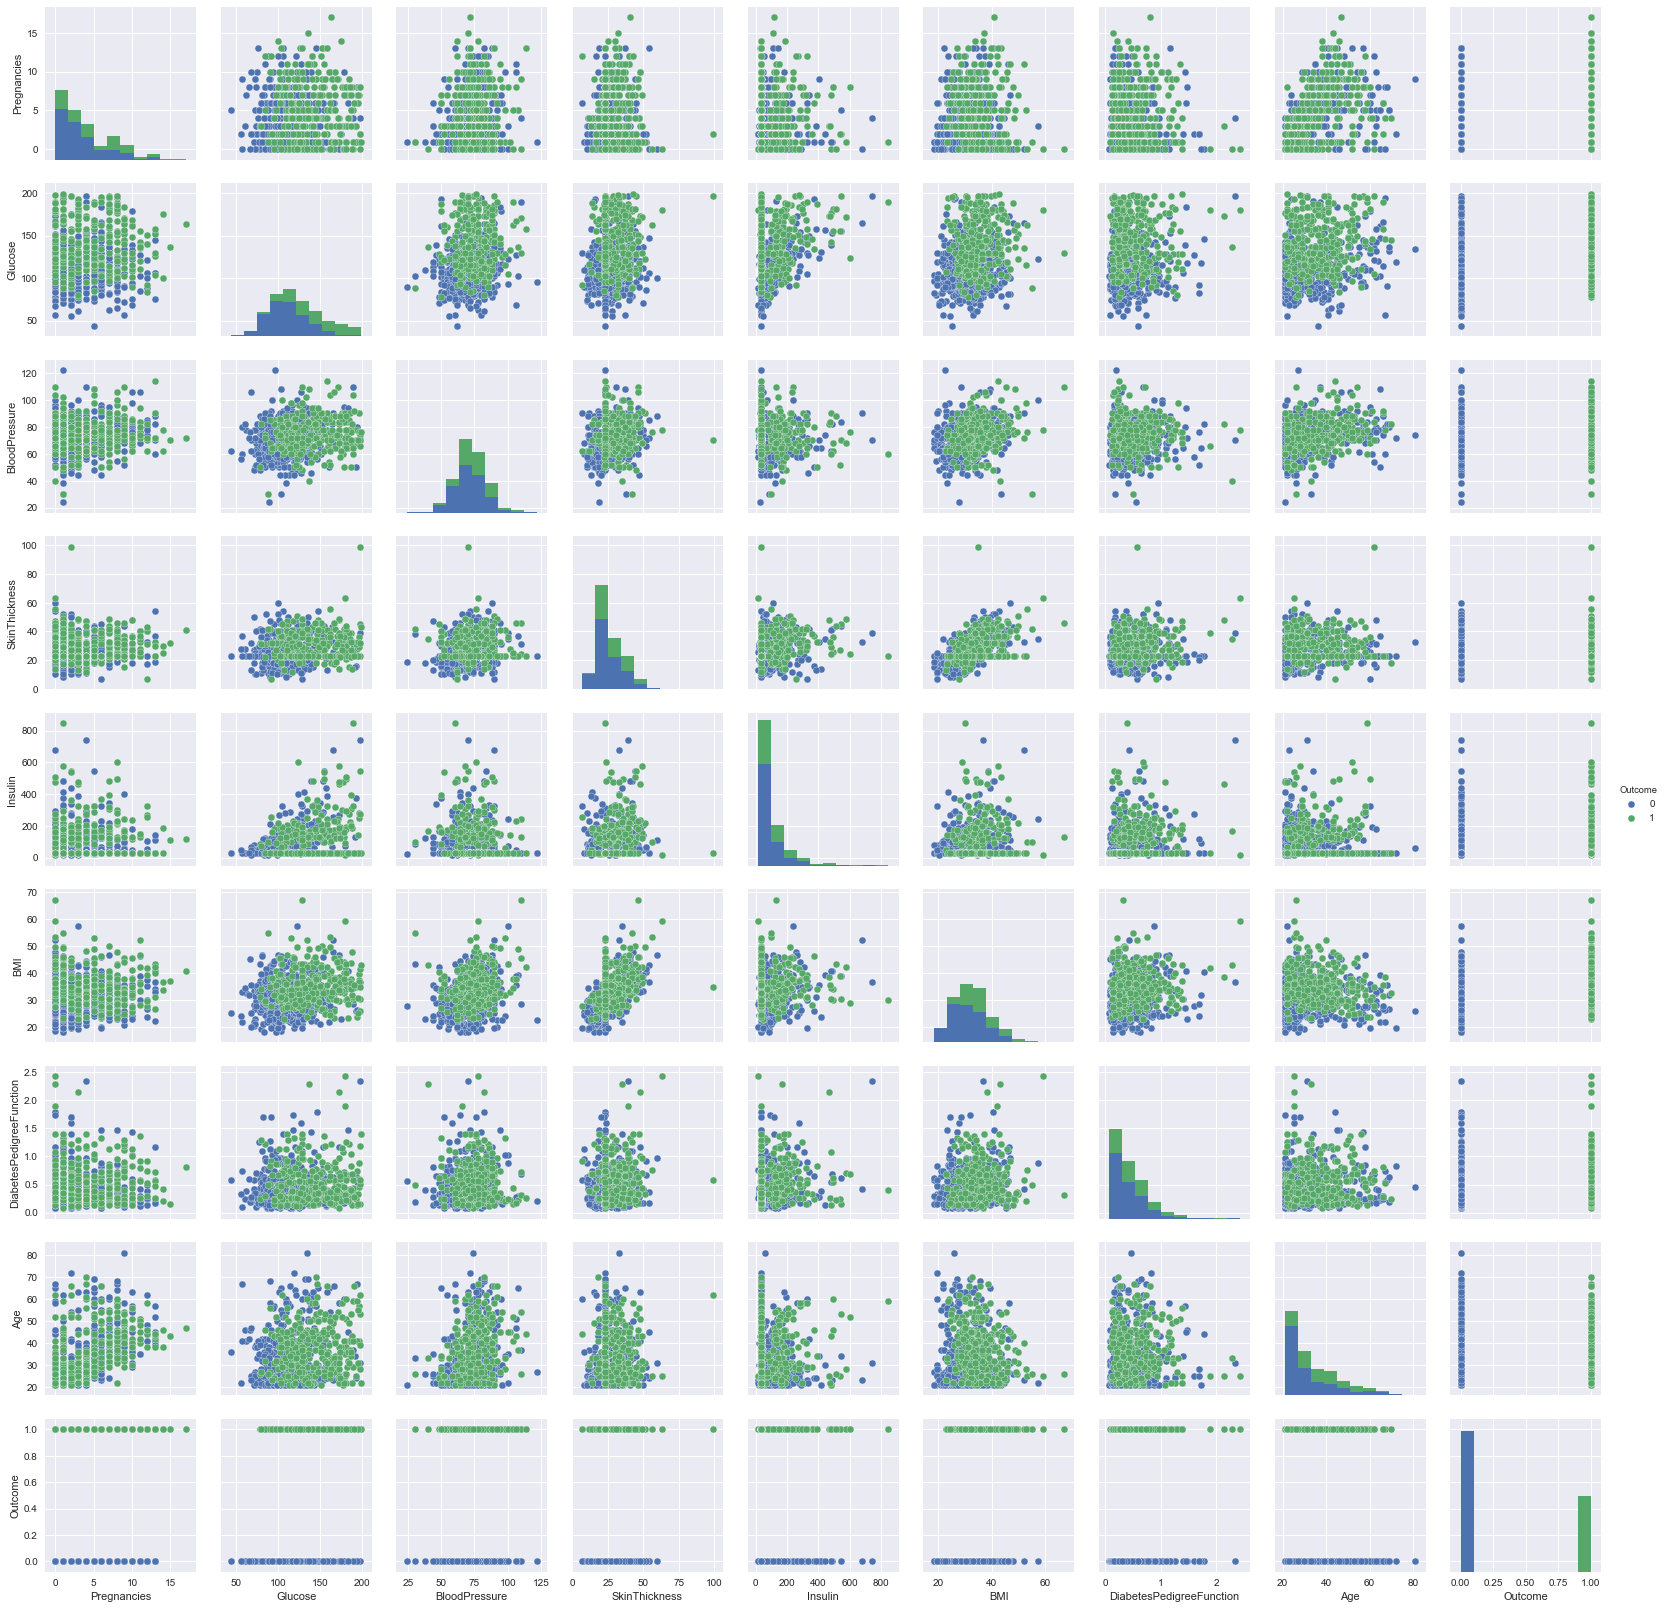

In [15]:
sns.pairplot(pima_df, hue = "Outcome")

In [16]:
((pima_df.corr()).T)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000


1. Pregnancy and Age has a moderate positive correlation. 
2. Glucose and Insulin have has a positive correlation. 
3. Blood pressure has a weak positive correlation with Age.
4. Skin thickness and BMI has a moderate positive correlation. 
5. rest all variables do not have correlation
6. The range of distribution of "outcome" against all variables shows similar range of spread.
7. The skewness is the distribution of "outcome variable 1" is reflective in pairplot suggests that dataset is skewed towards "No Diabetes"

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [17]:
Y = pandas.DataFrame(pima_df["Outcome"])
X = pima_df.iloc[:,0:7]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=100)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [18]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
y_predict = dt_model.predict(X_test)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [20]:
print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test, y_test))

1.0
0.6926406926406926


In [21]:
print(metrics.confusion_matrix(y_test, y_predict))

[[113  37]
 [ 34  47]]


Print the feature importance of the decision model - Optional

In [22]:
print (pandas.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Pregnancies               0.074078
Glucose                   0.299929
BloodPressure             0.102361
SkinThickness             0.100675
Insulin                   0.073805
BMI                       0.212387
DiabetesPedigreeFunction  0.136765


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
y_predict1 = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict1))

0.7142857142857143
[[118  32]
 [ 34  47]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [25]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=7)
abcl = abcl.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
y_predict2 = abcl.predict(X_test)
print(abcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict2))

0.7056277056277056
[[112  38]
 [ 30  51]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [27]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
y_predict3 = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict3))

0.7142857142857143
[[117  33]
 [ 33  48]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
y_predict4 = gbcl.predict(X_test)
print(gbcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7142857142857143
[[113  37]
 [ 34  47]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.